<a href="https://www.kaggle.com/code/patimejia/goes16-contrail-detection-rle-encoding?scriptVersionId=136141882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

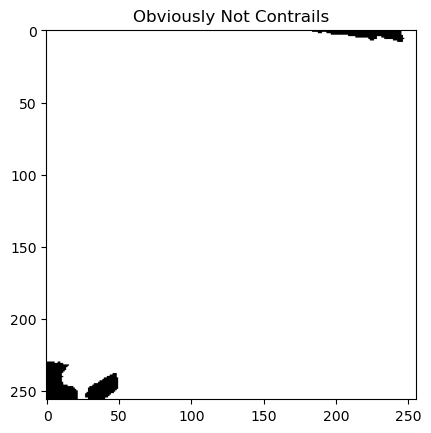

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

def rle_encode(image, foreground_value=1):
    """Run length encoding."""
    dots = np.where(image.T.flatten() == foreground_value)[0]
    run_lengths = []
    prev = -2
    for dot in dots:
        if (dot > prev + 1): run_lengths.extend((dot + 1, 0))
        run_lengths[-1] += 1
        prev = dot
    return run_lengths

def rle_to_string(rle):
    """Converts RLE to a string."""
    return '-'.join(map(str, rle)) if rle else '-'

def create_mask(data_path, record, num_pixels, shape=(256, 256)):
    """Creates a mask for the given record."""
    band_08 = np.load(data_path / 'test' / record / 'band_08.npy').sum(axis=2)
    preds = np.c_[np.unravel_index(np.argpartition(band_08.ravel(), -num_pixels)[-num_pixels:], band_08.shape)]
    mask = np.zeros(shape)
    mask[preds[:, 0], preds[:, 1]] = 1
    return mask

def visualize_mask(mask):
    """Visualizes the mask using matplotlib."""
    import matplotlib.pyplot as plt
    plt.imshow(mask, cmap='Greys')
    plt.title("Obviously Not Contrails")
    plt.show()

def prepare_submission(submission, record, mask):
    """Prepares and updates the submission DataFrame."""
    rle_mask = rle_encode(mask)
    submission.loc[int(record), 'encoded_pixels'] = rle_to_string(rle_mask)

def main(data_path, num_plots=1):
    """Main function."""
    data_path = Path(data_path)
    test_records = [entry.name for entry in data_path.glob('test/*') if entry.is_dir()]
    num_pixels = 1000

    submission = pd.read_csv(data_path / 'sample_submission.csv', index_col='record_id')

    for i, record in enumerate(test_records):
        mask = create_mask(data_path, record, num_pixels)
        if i < num_plots:  # Visualize the masks for the first 'num_plots' records
            visualize_mask(mask)
        prepare_submission(submission, record, mask)

    submission.to_csv('submission.csv')

# Directly call main with your data_path and num_plots as arguments
main('/kaggle/input/google-research-identify-contrails-reduce-global-warming', num_plots=1)

# Contrail Detection using RLE Encoding

This script uses Run Length Encoding (RLE) to detect contrails in satellite images. It imports necessary libraries such as numpy, pandas, and pathlib. The script defines several functions such as `rle_encode` to perform RLE, `rle_to_string` to convert RLE to a string, `create_mask` to create a mask for the given record, `visualize_mask` to visualize the mask using matplotlib and `prepare_submission` to prepare and update the submission DataFrame. The main function calls these functions and saves the submission in a csv file.

## What is RLE?
Run-length encoding (RLE) is a form of lossless data compression in which runs of data (sequences in which the same data value occurs in many consecutive data elements) are stored as a single data value and count, rather than as the original run. For example, consider a string of characters "AAABBCCCC". Using RLE, this string can be compressed to "3A2B4C", where the numbers represent the count of consecutive characters and the letters represent the characters themselves.

RLE is most efficient on data that contains many such runs. For example, simple graphic images such as icons, line drawings, and animations often contain long runs of the same color or pattern. However, for files that do not have many runs, RLE could increase the file size.

**Conclusion:** This script provides an efficient way to detect contrails in satellite images using RLE encoding.

- `import numpy as np`: imports numpy for numerical computing
- `import pandas as pd`: imports pandas for data manipulation and analysis
- `from pathlib import Path`: imports Path for handling file paths
- `def rle_encode(image, foreground_value=1)`: performs RLE on input image with foreground value
- `def rle_to_string(rle)`: converts RLE to a string
- `def create_mask(data_path, record, num_pixels, shape=(256, 256))`: creates mask for given record
- `def visualize_mask(mask)`: visualizes mask using matplotlib
- `def prepare_submission(submission, record, mask)`: prepares and updates submission DataFrame
- `def main(data_path, num_plots=1)`: main function calls others and saves submission. The optional argument `num_plots` specifies how many masks to visualize.

# Acknowledgement
### This script is inspired by [INVERSION’s notebook](https://www.kaggle.com/code/inversion/contrails-rle-submission) on Kaggle.
